In [1]:
import os
import fitz

In [2]:
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import imageio

pseudo_times = [str(i) for i in range(1, 10)]
_sub_dirs = ['2D', '3D', 'rna', 'volume']

def generate(_dir):
    for pseudo_time in pseudo_times:
        fig = plt.figure()
        _base = 10
        gs1 = gridspec.GridSpec(nrows=_base*4, ncols=_base*6)
        ax = {
            '2D': fig.add_subplot(gs1[0:_base*4, 0:_base*4]),
            'rna': fig.add_subplot(gs1[0:_base, _base*4:_base*6]),
            'volume': fig.add_subplot(gs1[_base:_base*2, _base*4:_base*60]),
            '3D': fig.add_subplot(gs1[_base*2:_base*4, _base*4:_base*6]),
        }

        for _sub_dir in _sub_dirs:
            doc = fitz.open(os.path.join(_dir, _sub_dir, '{}.pdf'.format(pseudo_time)))
            for page in doc:
                pix = page.get_pixmap()
                break
            doc.close()

            mode = "RGBA" if pix.alpha else "RGB"
            img = Image.frombytes(mode, [pix.width, pix.height], pix.samples)

            ax[_sub_dir].axis('off')
            ax[_sub_dir].imshow(img)

        plt.savefig(os.path.join(_dir, '{}.png'.format(pseudo_time)), dpi=600)
        plt.show()
    
    for _, _, files in os.walk(_dir, topdown=True):
        gif_images = [
            imageio.imread(os.path.join(_dir, file_name)) for file_name in files if file_name.endswith('png')
        ]
        imageio.mimsave(os.path.join(_dir, 'combine.gif'), gif_images, fps=1)
        break

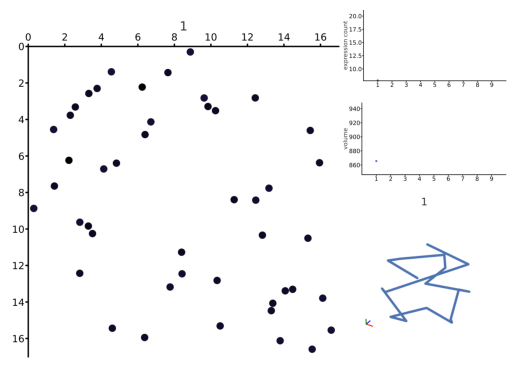

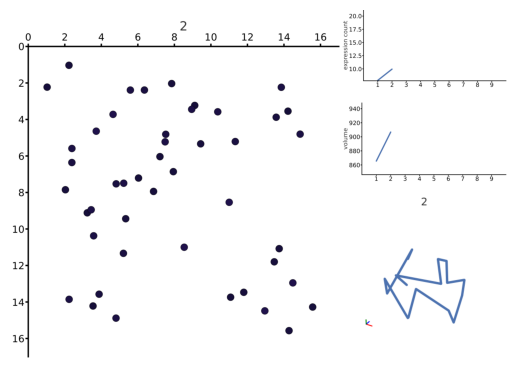

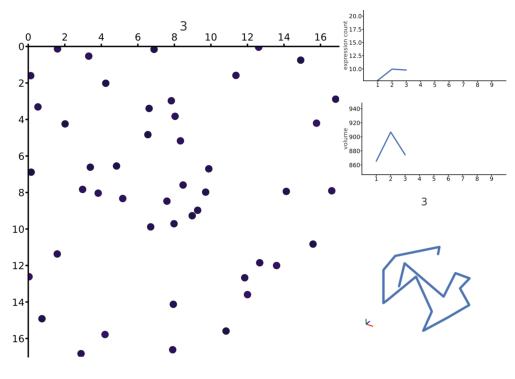

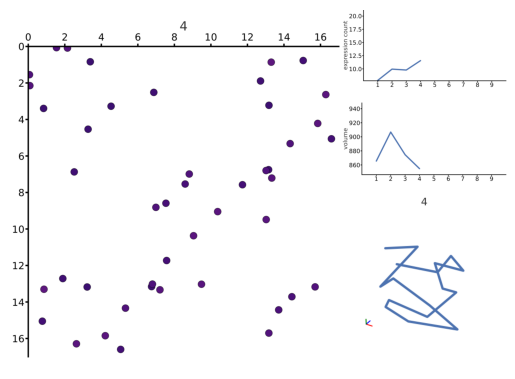

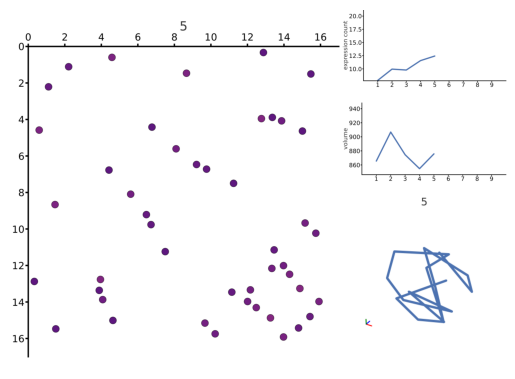

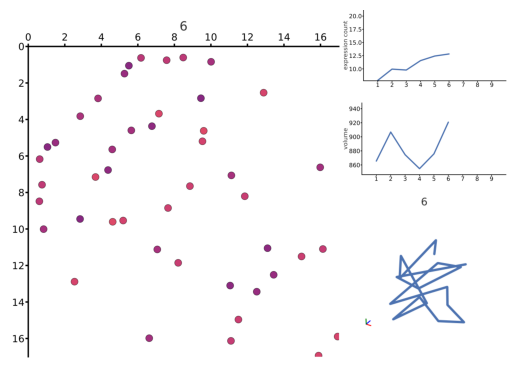

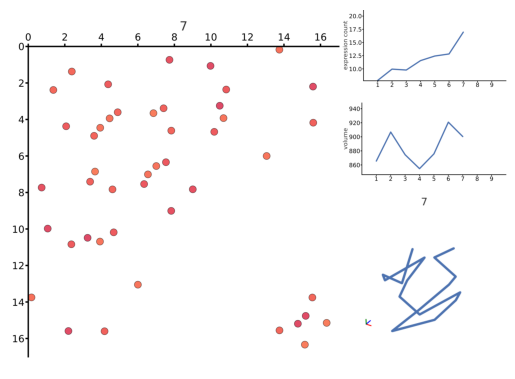

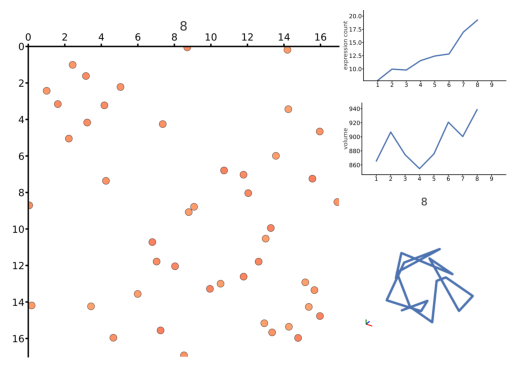

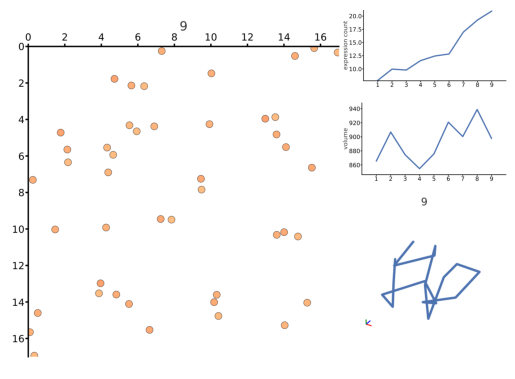

/tmp/ipykernel_124529/3285314986.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.imread(os.path.join(_dir, file_name)) for file_name in files if file_name.endswith('png')


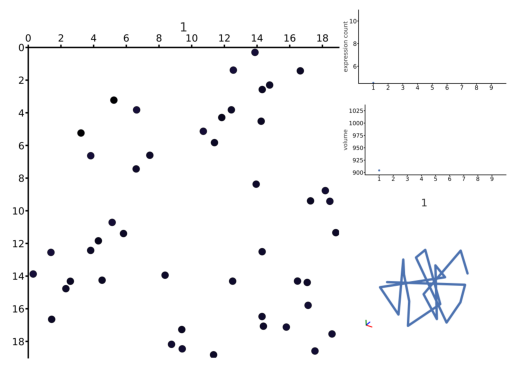

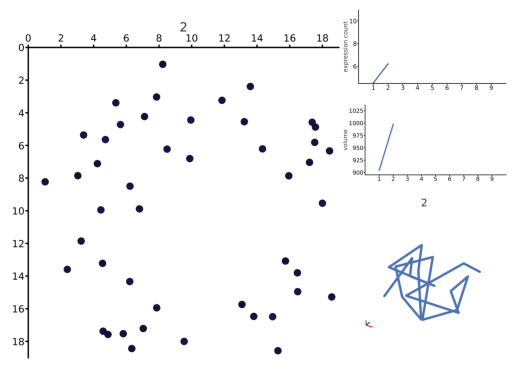

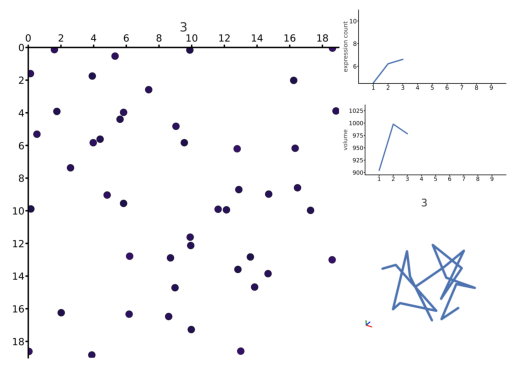

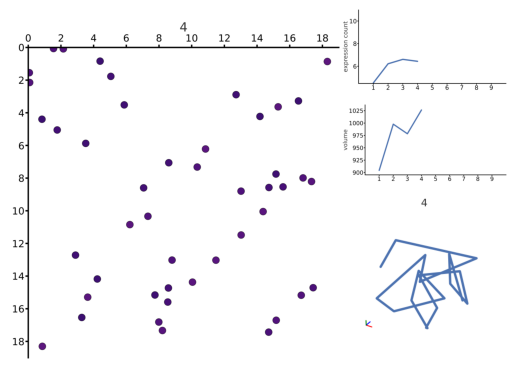

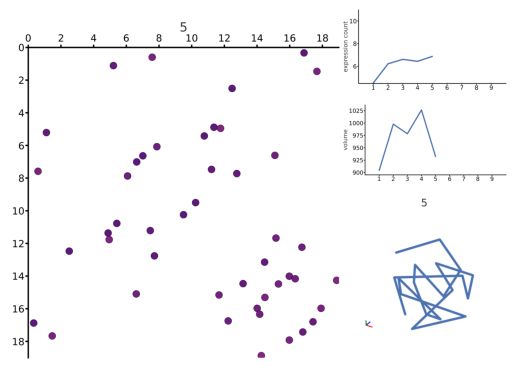

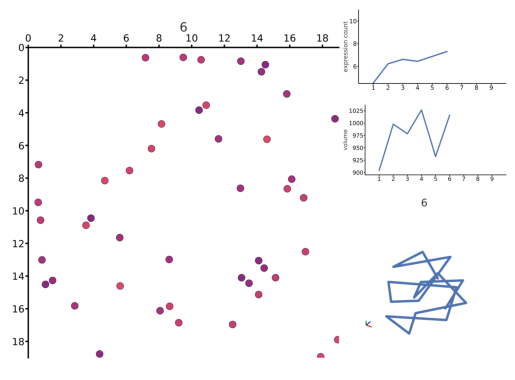

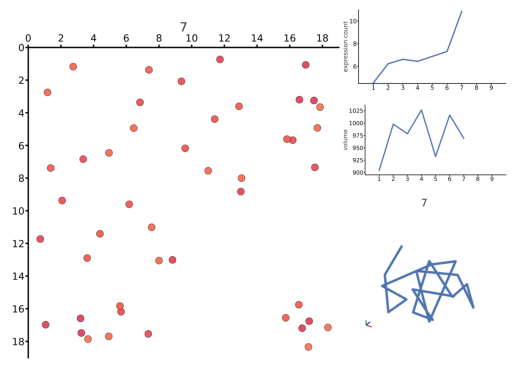

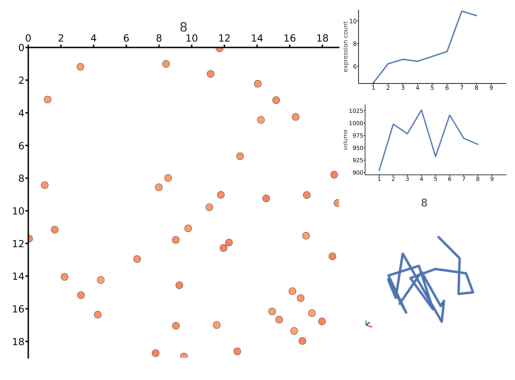

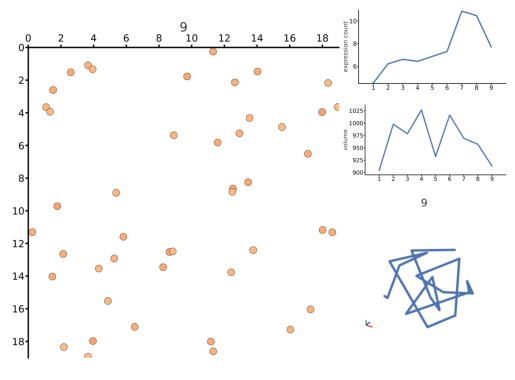

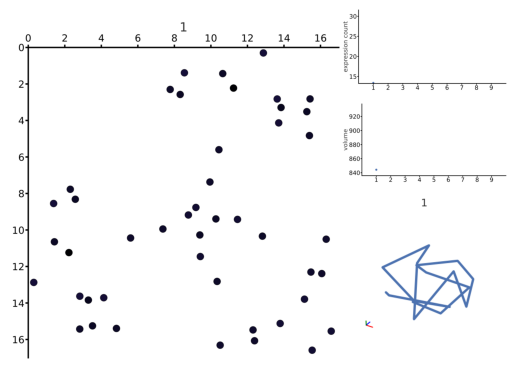

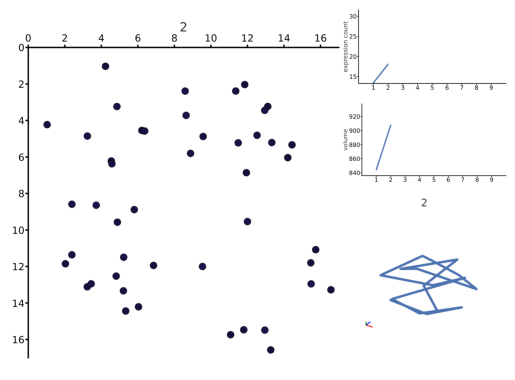

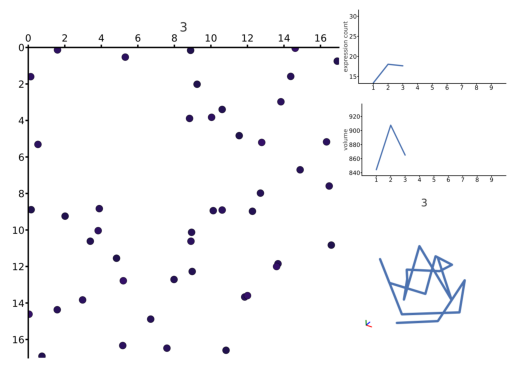

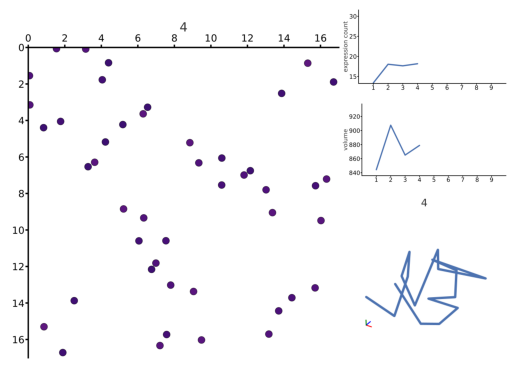

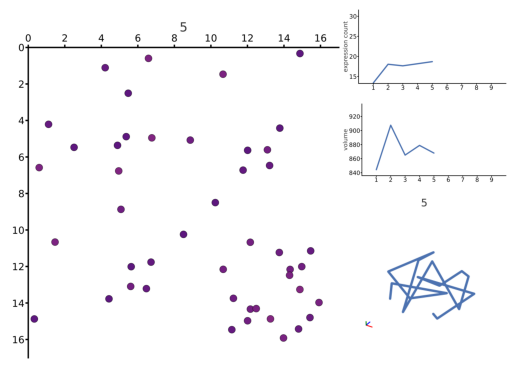

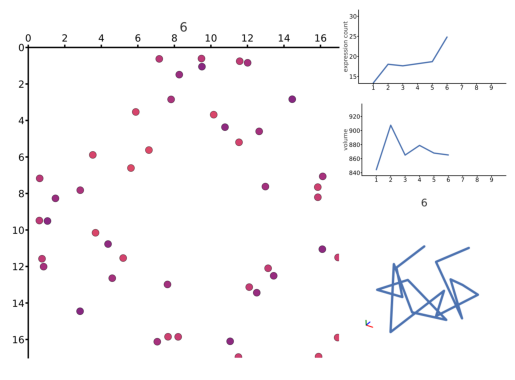

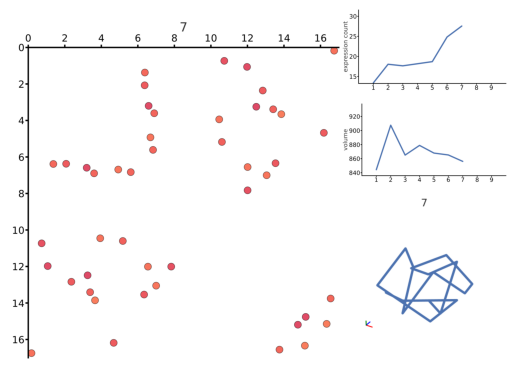

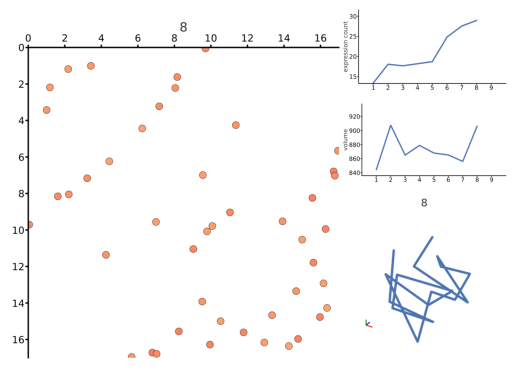

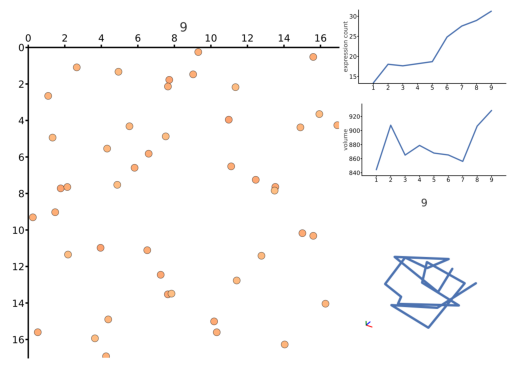

In [3]:
generate('/lmh_data/work/SEE/analyse/figure_file/pseudo_time/MBP')
generate('/lmh_data/work/SEE/analyse/figure_file/pseudo_time/PIP4K2A')
generate('/lmh_data/work/SEE/analyse/figure_file/pseudo_time/QKI')